In [7]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create mesh grid for contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)

# Rosenbrock function (banana function)
# f(x, y) = (1 - x)^2 + 100(y - x^2)^2
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Gradient descent implementation
def gradient_descent(start_x, start_y, learning_rate=0.0001, n_iterations=100):
    path_x = [start_x]
    path_y = [start_y]
    
    x = start_x
    y = start_y
    
    for _ in range(n_iterations):
        # Compute gradients
        dx = -2 * (1 - x) - 400 * x * (y - x**2)
        dy = 200 * (y - x**2)
        
        # Update parameters
        x = x - learning_rate * dx
        y = y - learning_rate * dy
        
        path_x.append(x)
        path_y.append(y)
        
    return np.array(path_x), np.array(path_y)

# Run gradient descent from different starting points
start_points = [
    (-1.5, 2.5, 'red'),
    (0.5, 2.0, 'blue'),
    (-0.5, 0.5, 'green')
]

# Create figure
fig = go.Figure()

# Add contour plot
fig.add_trace(
    go.Contour(
        x=x,
        y=y,
        z=Z,
        contours=dict(
            start=0,
            end=100,
            size=5,
            coloring='heatmap'
        ),
        colorscale='Viridis',
        name='Error Surface'
    )
)

# Add gradient descent paths
for start_x, start_y, color in start_points:
    path_x, path_y = gradient_descent(start_x, start_y)
    
    # Add path line
    fig.add_trace(
        go.Scatter(
            x=path_x,
            y=path_y,
            mode='lines+markers',
            line=dict(color=color, width=2),
            marker=dict(size=4),
            name=f'Path from ({start_x}, {start_y})',
            showlegend=True
        )
    )
    
    # Add start point
    fig.add_trace(
        go.Scatter(
            x=[start_x],
            y=[start_y],
            mode='markers',
            marker=dict(color=color, size=10, symbol='star'),
            name=f'Start ({start_x}, {start_y})',
            showlegend=True
        )
    )

# Update layout
fig.update_layout(
    title='Gradient Descent on Rosenbrock Function',
    xaxis_title='x',
    yaxis_title='y',
    width=800,
    height=600,
    hovermode='closest',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    )
)

# Make it more interactive
fig.update_traces(
    contours_showlabels=True,  # show labels on contours
    contours_labelfont=dict(  # label font properties
        size=12,
        color='white'
    )
)

# Add hover information
fig.update_traces(
    hovertemplate="<b>x</b>: %{x:.3f}<br>" +
                  "<b>y</b>: %{y:.3f}<br>" +
                  "<b>z</b>: %{z:.3f}<extra></extra>"
)

# Show the plot
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'contours'

Did you mean "connectgaps"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available. If fillgradient is
            specified, fillcolor is ignored except for setting the
            background color of the hover label, if any.
        fillgradient
            Sets a fill gradient. If not specified, the fillcolor
            is used instead.
        fillpattern
            Sets the pattern within the marker.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant in the following cases: 1. when
            `scattermode` is set to "group". 2. when `stackgroup`
            is used, and only the first `orientation` found in the
            `stackgroup` will be used - including if `visible` is
            "legendonly" but not if it is `false`. Sets the
            stacking direction. With "v" ("h"), the y (x) values of
            subsequent traces are added. Also affects the default
            value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        zorder
            Sets the layer on which this trace is displayed,
            relative to other SVG traces on the same subplot. SVG
            traces with higher `zorder` appear in front of those
            with lower `zorder`.
        
Did you mean "connectgaps"?

Bad property path:
contours_showlabels
^^^^^^^^

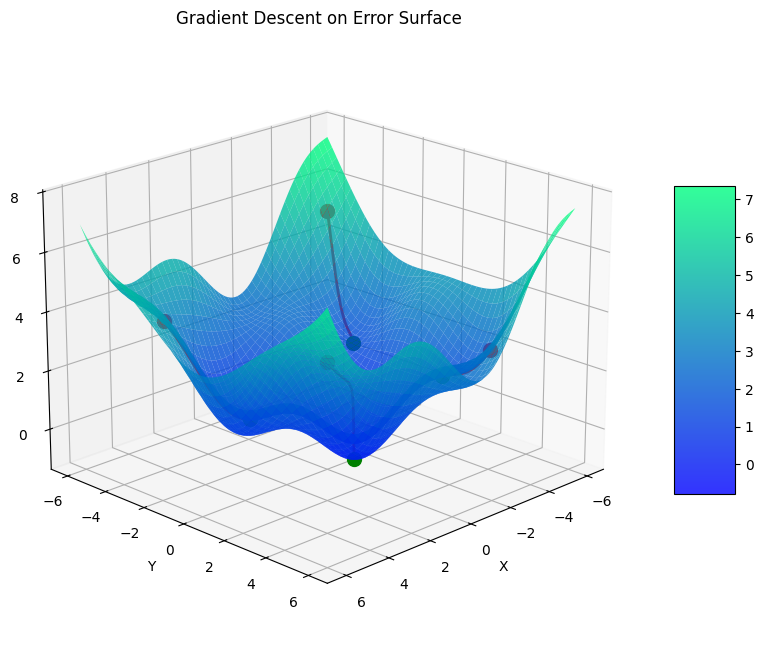

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate surface data
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

# Define error surface function (bowl-shaped with some local minima)
Z = 0.1 * (X**2 + Y**2) + np.sin(X) * np.cos(Y)

# Plot the surface
# surface = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
# surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
surface = ax.plot_surface(X, Y, Z, cmap='winter', alpha=0.8)

# Generate gradient descent path
def gradient_descent(start_x, start_y, learning_rate=0.1, n_steps=50):
    path_x = [start_x]
    path_y = [start_y]
    path_z = [0.1 * (start_x**2 + start_y**2) + np.sin(start_x) * np.cos(start_y)]
    
    for _ in range(n_steps):
        x = path_x[-1]
        y = path_y[-1]
        
        # Compute gradients
        dx = 0.2 * x + np.cos(x) * np.cos(y)
        dy = 0.2 * y - np.sin(x) * np.sin(y)
        
        # Update position
        new_x = x - learning_rate * dx
        new_y = y - learning_rate * dy
        new_z = 0.1 * (new_x**2 + new_y**2) + np.sin(new_x) * np.cos(new_y)
        
        path_x.append(new_x)
        path_y.append(new_y)
        path_z.append(new_z)
    
    return np.array(path_x), np.array(path_y), np.array(path_z)

# Generate and plot multiple gradient descent paths from different starting points
start_points = [
    (5, 5),
    (-4, 4),
    (4, -4),
    (-5, -5)
]

for start_x, start_y in start_points:
    path_x, path_y, path_z = gradient_descent(start_x, start_y)
    ax.plot(path_x, path_y, path_z, 'r-', linewidth=2, markersize=8)
    ax.scatter(path_x[0], path_y[0], path_z[0], color='red', s=100, label='Start')
    ax.scatter(path_x[-1], path_y[-1], path_z[-1], color='green', s=100, label='End')

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Error')
ax.set_title('Gradient Descent on Error Surface')

# Add a color bar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Adjust the view angle for better visualization
ax.view_init(elev=20, azim=45)

plt.show()

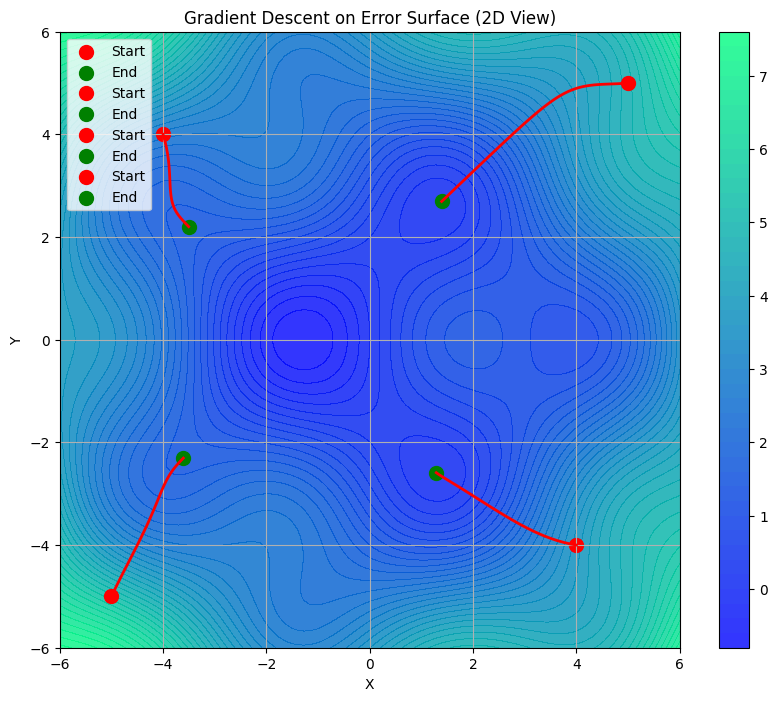

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate surface data
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

# Define error surface function (bowl-shaped with some local minima)
Z = 0.1 * (X**2 + Y**2) + np.sin(X) * np.cos(Y)

# Create a 2D contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='winter', alpha=0.8)
plt.colorbar(contour)

# Generate gradient descent path
def gradient_descent(start_x, start_y, learning_rate=0.1, n_steps=50):
    path_x = [start_x]
    path_y = [start_y]
    
    for _ in range(n_steps):
        x = path_x[-1]
        y = path_y[-1]
        
        # Compute gradients
        dx = 0.2 * x + np.cos(x) * np.cos(y)
        dy = 0.2 * y - np.sin(x) * np.sin(y)
        
        # Update position
        new_x = x - learning_rate * dx
        new_y = y - learning_rate * dy
        
        path_x.append(new_x)
        path_y.append(new_y)
    
    return np.array(path_x), np.array(path_y)

# Generate and plot multiple gradient descent paths from different starting points
start_points = [
    (5, 5),
    (-4, 4),
    (4, -4),
    (-5, -5)
]

for start_x, start_y in start_points:
    path_x, path_y = gradient_descent(start_x, start_y)
    plt.plot(path_x, path_y, 'r-', linewidth=2, markersize=8)
    plt.scatter(path_x[0], path_y[0], color='red', s=100, label='Start')
    plt.scatter(path_x[-1], path_y[-1], color='green', s=100, label='End')

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent on Error Surface (2D View)')
plt.legend()
plt.grid()
plt.show()


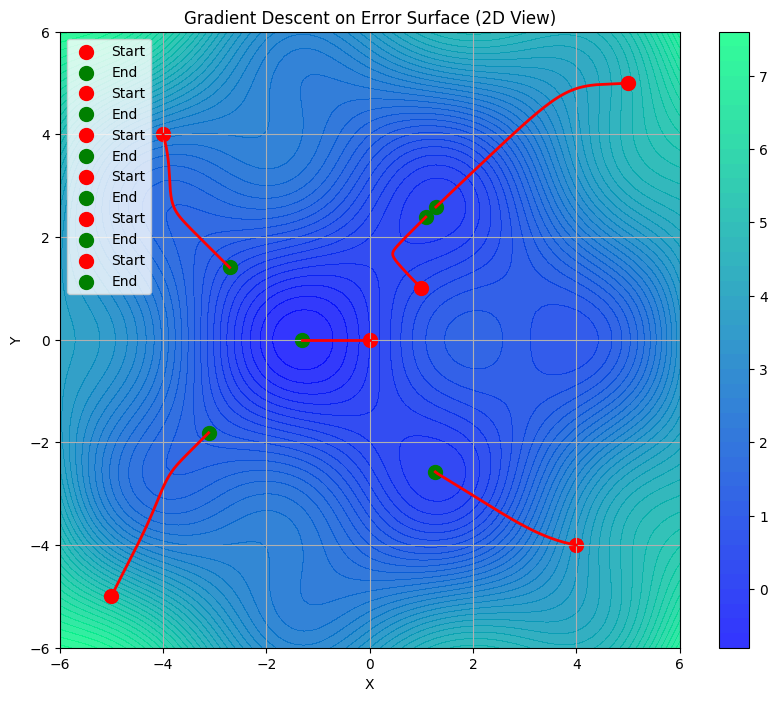

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate surface data
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

# Define error surface function
Z = 0.1 * (X**2 + Y**2) + np.sin(X) * np.cos(Y)

# Create a 2D contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='winter', alpha=0.8)
plt.colorbar(contour)

# Generate gradient descent path
def gradient_descent(start_x, start_y, learning_rate=0.01, n_steps=100):
    path_x = [start_x]
    path_y = [start_y]
    
    for _ in range(n_steps):
        x = path_x[-1]
        y = path_y[-1]
        
        # Compute gradients
        dx = 0.2 * x + np.cos(x) * np.cos(y)
        dy = 0.2 * y - np.sin(x) * np.sin(y)
        
        # Update position
        new_x = x - learning_rate * dx
        new_y = y - learning_rate * dy
        
        path_x.append(new_x)
        path_y.append(new_y)
    
    return np.array(path_x), np.array(path_y)

# Generate and plot multiple gradient descent paths from different starting points
start_points = [
    (5, 5),
    (-4, 4),
    (4, -4),
    (-5, -5),
    (0, 0),  # Adding a central starting point
    (1, 1),  # Adding another point close to the center
]

for start_x, start_y in start_points:
    path_x, path_y = gradient_descent(start_x, start_y, learning_rate=0.05, n_steps=150)
    plt.plot(path_x, path_y, 'r-', linewidth=2)
    plt.scatter(path_x[0], path_y[0], color='red', s=100, label='Start')
    plt.scatter(path_x[-1], path_y[-1], color='green', s=100, label='End')

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent on Error Surface (2D View)')
plt.legend()
plt.grid()
plt.show()


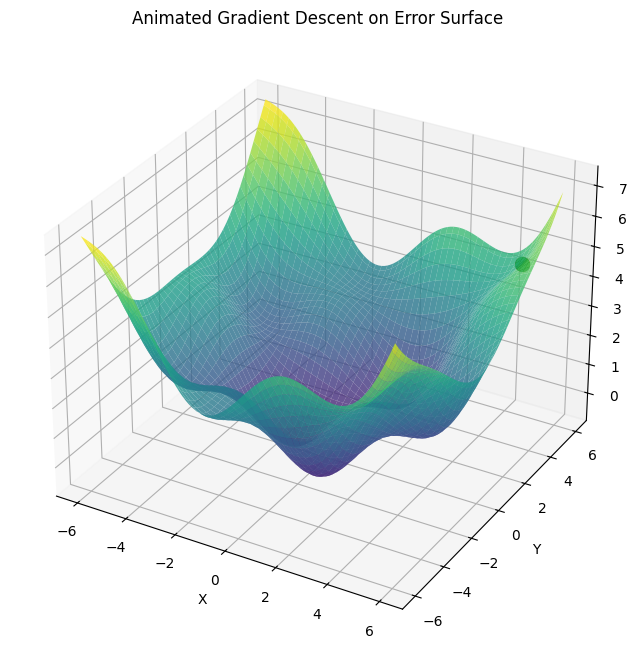

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the error surface function
def error_surface(x, y):
    return 0.1 * (x**2 + y**2) + np.sin(x) * np.cos(y)

# Gradient descent function
def gradient_descent(start_x, start_y, learning_rate=0.05, n_steps=100):
    path_x = [start_x]
    path_y = [start_y]
    path_z = [error_surface(start_x, start_y)]
    
    for _ in range(n_steps):
        x = path_x[-1]
        y = path_y[-1]
        
        # Compute gradients
        dx = 0.2 * x + np.cos(x) * np.cos(y)
        dy = 0.2 * y - np.sin(x) * np.sin(y)
        
        # Update position
        new_x = x - learning_rate * dx
        new_y = y - learning_rate * dy
        
        path_x.append(new_x)
        path_y.append(new_y)
        path_z.append(error_surface(new_x, new_y))
    
    return np.array(path_x), np.array(path_y), np.array(path_z)

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate surface data for the plot
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = error_surface(X, Y)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Generate the gradient descent path
start_x, start_y = 5, 5  # Starting point
path_x, path_y, path_z = gradient_descent(start_x, start_y)

# Initialize the line object for the path
line, = ax.plot([], [], [], 'r-', linewidth=2)
point_start = ax.scatter([], [], [], color='red', s=100)  # Start point
point_end = ax.scatter([], [], [], color='green', s=100)  # End point

# Animation update function
def update(frame):
    line.set_data(path_x[:frame+1], path_y[:frame+1])
    line.set_3d_properties(path_z[:frame+1])
    point_start._offsets3d = (path_x[0:1], path_y[0:1], path_z[0:1])
    point_end._offsets3d = (path_x[frame:frame+1], path_y[frame:frame+1], path_z[frame:frame+1])
    return line, point_start, point_end

# Create animation
ani = FuncAnimation(fig, update, frames=len(path_x), blit=True, interval=100)

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Error')
ax.set_title('Animated Gradient Descent on Error Surface')

plt.show()


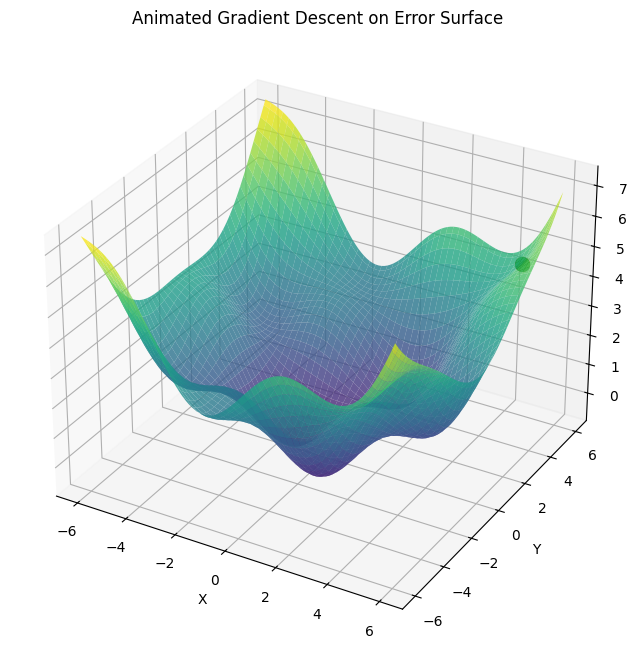

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Define the error surface function
def error_surface(x, y):
    return 0.1 * (x**2 + y**2) + np.sin(x) * np.cos(y)

# Gradient descent function
def gradient_descent(start_x, start_y, learning_rate=0.1, n_steps=50):
    path_x = [start_x]
    path_y = [start_y]
    path_z = [error_surface(start_x, start_y)]
    
    for _ in range(n_steps):
        x = path_x[-1]
        y = path_y[-1]
        
        # Compute gradients
        dx = 0.2 * x + np.cos(x) * np.cos(y)
        dy = 0.2 * y - np.sin(x) * np.sin(y)
        
        # Update position
        new_x = x - learning_rate * dx
        new_y = y - learning_rate * dy
        
        path_x.append(new_x)
        path_y.append(new_y)
        path_z.append(error_surface(new_x, new_y))
    
    return np.array(path_x), np.array(path_y), np.array(path_z)

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate surface data for the plot
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = error_surface(X, Y)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Generate the gradient descent path
start_x, start_y = 5, 5  # Starting point
path_x, path_y, path_z = gradient_descent(start_x, start_y)

# Initialize the line object for the path
line, = ax.plot([], [], [], 'r-', linewidth=2)
point_start = ax.scatter([], [], [], color='red', s=100)  # Start point
point_end = ax.scatter([], [], [], color='green', s=100)  # End point

# Animation update function
def update(frame):
    line.set_data(path_x[:frame+1], path_y[:frame+1])
    line.set_3d_properties(path_z[:frame+1])
    point_start._offsets3d = (path_x[0:1], path_y[0:1], path_z[0:1])
    point_end._offsets3d = (path_x[frame:frame+1], path_y[frame:frame+1], path_z[frame:frame+1])
    return line, point_start, point_end

# Create animation
ani = FuncAnimation(fig, update, frames=len(path_x), blit=True, interval=100)

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Error')
ax.set_title('Animated Gradient Descent on Error Surface')

# Show the animation
plt.show()


In [14]:
import numpy as np
import plotly.graph_objects as go

def do_nesterov_accelerated_gradient_descent():
    w, b, eta = init_w, init_b, 1.0
    prev_v_w, prev_v_b, gamma = 0, 0, 0.9
    
    # Create arrays to store the values of w, b, and loss
    w_values = []
    b_values = []
    loss_values = []
    
    for i in range(max_epochs):
        dw, db = 0, 0
        # Do partial updates
        v_w = gamma * prev_v_w
        v_b = gamma * prev_v_b
        for x, y in zip(X, Y):
            # Calculate gradients after partial update
            dw += grad_w(w - v_w, b - v_b, x, y)
            db += grad_b(w - v_w, b - v_b, x, y)
        # Now do the full update
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b
        
        # Calculate the loss and store the values
        loss = np.sum((y - (w * x + b))**2) / len(X)
        w_values.append(w)
        b_values.append(b)
        loss_values.append(loss)
    
    # Create the 3D plot
    fig = go.Figure(data=[
        go.Scatter3d(
            x=w_values,
            y=b_values,
            z=loss_values,
            mode='markers',
            marker=dict(
                size=5,
                color=loss_values,
                colorscale='Viridis',
                opacity=0.8
            )
        )
    ])
    fig.update_layout(
        scene=dict(
            xaxis_title='w',
            yaxis_title='b',
            zaxis_title='Loss'
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    fig.show()

In [16]:
import numpy as np

# Set up the data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 6, 8, 10])

# Define the gradient functions
def grad_w(w, b, x, y):
    return 2 * (y - (w * x + b)) * x

def grad_b(w, b, x, y):
    return 2 * (y - (w * x + b))

# Set the initial parameters
init_w = 0
init_b = 0
max_epochs = 100

# Run the Nesterov Accelerated Gradient Descent
do_nesterov_accelerated_gradient_descent()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14244\1588265171.py:31: RuntimeWarning:

overflow encountered in scalar power



In [22]:
X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):  # sigmoid with parameters w,b
    return 1.0 / (1.0 + np.exp(-(w*x+b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_gradient_descent():
    w, b, eta, max_epochs = 2, 2, 1.0, 1000
    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w = w - eta * dw
        b = b - eta * db